<a href="https://colab.research.google.com/github/Elwing-Chou/tibaml0315/blob/main/cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
x = pd.DataFrame(iris["data"], columns=iris["feature_names"])
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [2]:
import numpy as np
x_np = np.array(x)

In [3]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=3)
cluster.fit(x_np)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [4]:
# 中心點可以當作那群的經典範例
cluster.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [5]:
# 存起來->分類演算法
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

假設不知道K, 所有K都試一遍, 檢查如果選擇這個K的時候, 聚合力(親近疏遠程度)表現如何

silhoette score

$ a(親近度) = \frac {1}{m} \sum_{j=m} \frac {1}{n_1} \sum_{i=n_1} (p_j, 所在群_i) $

$ b(疏遠度) = \frac {1}{m} \sum_{j=m} \frac {1}{n_2} \sum_{i=n_2} (p_j, 最近一個非所在群_i) $

$ silhouette score = 1 - \frac{a}{b} $

範圍: 0(瞎猜) - 1(best)

In [8]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

如果在我不知道的情況下, 有可能選2或選3都行, silhouette只是一個參考數值, 只要在0.5up就是這個分群還不錯, 要選哪個你自己決定

統計學很多時候給你的值只是一個參考數值, 並不是絕對答案

In [9]:
from sklearn.metrics import silhouette_score
for i in range(2, 20):
    test = KMeans(n_clusters=i)
    test.fit(x_np)
    score = silhouette_score(x_np, test.labels_)
    print(i, ":", score)

2 : 0.6810461692117462
3 : 0.5528190123564095
4 : 0.49805050499728737
5 : 0.4930804067193521
6 : 0.3655218859995459
7 : 0.3581722472721968
8 : 0.35974549238457626
9 : 0.3094997080699369
10 : 0.33916630889932764
11 : 0.29110243839293426
12 : 0.30568868885758965
13 : 0.28907415357491817
14 : 0.31426076076525156
15 : 0.2946857772815513
16 : 0.3047520741333153
17 : 0.2811803915969173
18 : 0.28124284885143797
19 : 0.2772891462952094


<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>

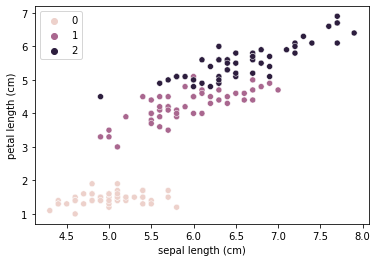

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

xaxis = x["sepal length (cm)"]
yaxis = x["petal length (cm)"]
sns.scatterplot(x=xaxis, y=yaxis, hue=iris["target"])